In [2]:
!pip install openai

In [1]:
import csv
import openai

def get_keys():
    key = csv.reader(open('openai_key.csv', 'r'), delimiter=',')

    for row in key:
        openai_key = row[0]

    return openai_key

openai.api_key = get_keys()

In [4]:
text_correct =openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "user", "content": "corrija a frase: o 2? congresso"}
    ]
)

<OpenAIObject chat.completion id=chatcmpl-6sbm6WMfwXdFLl6cJOCMCByELNSbx at 0x226bdd33400> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "\n\nO 2\u00b0 Congresso.",
        "role": "assistant"
      }
    }
  ],
  "created": 1678472938,
  "id": "chatcmpl-6sbm6WMfwXdFLl6cJOCMCByELNSbx",
  "model": "gpt-3.5-turbo-0301",
  "object": "chat.completion",
  "usage": {
    "completion_tokens": 9,
    "prompt_tokens": 19,
    "total_tokens": 28
  }
}

In [17]:
text_correct =openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "user", "content": "corrija apenas o caractere � e retorne apenas a frase corrijida: o 2� congresso"}
    ]
)

In [18]:
text_correct['choices'][0]['message']['content'].replace('\n\n','')

'o 2º congresso'

In [23]:
incorrect_text = 'corrija apenas o caractere � e retorne apenas a frase corrijida: ap�s a pris�o dos jovens, como se fosse a m�dia enumerando os acontecimentos   �poca.'

text_correct =openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "user", "content": incorrect_text}
    ]
)

In [24]:
text_correct['choices'][0]['message']['content'].replace('\n\n','')

'Após a prisão dos jovens, como se fosse a mídia enumerando os acontecimentos época.'

In [27]:
incorrect_text = 'corrija caractere � e retorne apenas a frase corrijida: uma pessoa estava andando pela rua e viu um cachorro � atravessando a rua.'

text_correct =openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "user", "content": incorrect_text}
    ]
)

In [28]:
text_correct['choices'][0]['message']['content'].replace('\n\n','')

'Uma pessoa estava andando pela rua e viu um cachorro atravessando a rua.'

In [6]:
import pandas as pd

df = pd.read_csv('ambiguous_samples.csv', sep=">sep>", header=None)
df.columns = ['date', 'newspaper', 'news_id', 'invalid_word', 'fix_sample', 'slice']

C:\Users\thali\AppData\Local\Temp\ipykernel_28516\896843367.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('ambiguous_samples.csv', sep=">sep>", header=None)


In [7]:
df['slice'][1]

'especial para a Folha Para quem não passou, o período p�s-vestibular � traumático. Todo mundo -todo o mundo mesmo- vem perguntar como � que foi, e a sua auto-estima'

Teste com 2 caracteres estranhos na mesma frase

In [10]:
incorrect_text = 'o período p�s-vestibular � traumático'

text_correct =openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "user", "content": f"corrija o caractere � e retorne apenas a frase corrijida:{incorrect_text}"}
    ]
)

In [15]:
text_correct['usage']

<OpenAIObject at 0x1c81dc3f270> JSON: {
  "completion_tokens": 15,
  "prompt_tokens": 35,
  "total_tokens": 50
}

In [14]:
text_correct['usage']['total_tokens']

50

In [11]:
text_correct['choices'][0]['message']['content'].replace('\n\n','') 

'O período pós-vestibular é traumático.'

In [16]:
incorrect_text = 'porque o Janj�o (não � lindo o nome dele?)'

text_correct = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "user", "content": f"corrija o caractere � e retorne apenas a frase corrijida:{incorrect_text}"}
    ]
)

In [18]:
text_correct['usage']

<OpenAIObject at 0x1c81dc3f2c0> JSON: {
  "completion_tokens": 18,
  "prompt_tokens": 41,
  "total_tokens": 59
}

In [17]:
text_correct['choices'][0]['message']['content'].replace('\n\n','')

'Porque o Janjão (não é lindo o nome dele?)'

In [19]:
incorrect_text = " na base do `l� l� l� l� l�' mesmo, entre outras coisas"

text_correct = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "user", "content": f"corrija o caractere � e retorne apenas a frase corrijida:{incorrect_text}"}
    ]
)

In [22]:
text_correct['usage']

<OpenAIObject at 0x1c81dc86450> JSON: {
  "completion_tokens": 20,
  "prompt_tokens": 45,
  "total_tokens": 65
}

In [21]:
text_correct['choices'][0]['message']['content'].replace('\n\n','')

'na base do "lá lá lá lá lá" mesmo, entre outras coisas.'

In [11]:
incorrect_text = 'Não � � toa que ele'
text_correct = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "user", "content": f"corrija o caractere � e retorne apenas a frase corrijida:{incorrect_text}"}
    ]
)

In [14]:
type(text_correct)

openai.openai_object.OpenAIObject

In [12]:
text_correct['usage']

<OpenAIObject at 0x1f3962ef040> JSON: {
  "completion_tokens": 8,
  "prompt_tokens": 31,
  "total_tokens": 39
}

In [13]:
text_correct['choices'][0]['message']['content'].replace('\n\n','')

'Não é à toa que ele'

### Criação de um dataset com noticias incorretas e corrijidas

In [2]:
import pandas as pd

df = pd.read_csv('ambiguous_samples.csv', sep=">sep>", header=None)
df.columns = ['date', 'newspaper', 'news_id', 'invalid_word', 'fix_sample', 'slice']


C:\Users\thali\AppData\Local\Temp\ipykernel_2028\2777821513.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('ambiguous_samples.csv', sep=">sep>", header=None)


In [4]:
df_noticias = df[['news_id', 'fix_sample', 'slice']]

In [7]:
df_noticias_sample = df_noticias.sample(100)

In [42]:
with open ('noticias_sample.csv', 'w') as f:
    df_noticias_sample.to_csv(f, index=False)

In [9]:
incorrect_news = df_noticias_sample['slice'].tolist()
len(incorrect_news)

100

In [15]:
import time
text_correct = []
for _incorrect_news in incorrect_news:
    time.sleep(10)
    incorrect_text = _incorrect_news
    text_correct.append(openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
            {"role": "user", "content": f"corrija o caractere � e retorne apenas a frase corrijida:{incorrect_text}"}
        ]
    ))

In [ ]:
# arquivo com dados corrigidos
import json 
with open('text_correct.json', 'w') as f:
    json.dump(text_correct, f)

In [23]:
df_noticias_corretas = pd.DataFrame(text_correct)
df_noticias_corretas

,id,object,created,model,usage,choices
0,chatcmpl-6uPPhBBDDZPubiBllBocs6dnGh21X,chat.completion,1678902077,gpt-3.5-turbo-0301,"{'prompt_tokens': 87, 'completion_tokens': 44,...","[{'message': {'role': 'assistant', 'content': ..."
1,chatcmpl-6uPQ66ibPSMQfdHc3YqlaxeoWrZFK,chat.completion,1678902102,gpt-3.5-turbo-0301,"{'prompt_tokens': 78, 'completion_tokens': 62,...","[{'message': {'role': 'assistant', 'content': ..."
2,chatcmpl-6uPQSuw0ylz2pi7zW4cfZ5U2xir1i,chat.completion,1678902124,gpt-3.5-turbo-0301,"{'prompt_tokens': 86, 'completion_tokens': 63,...","[{'message': {'role': 'assistant', 'content': ..."
3,chatcmpl-6uPQsYUZcAgRzKU6VVuAgXi4x7bPB,chat.completion,1678902150,gpt-3.5-turbo-0301,"{'prompt_tokens': 78, 'completion_tokens': 56,...","[{'message': {'role': 'assistant', 'content': ..."
4,chatcmpl-6uPRCT2NmOxyGPEvRp5oBQnUSVTeU,chat.completion,1678902170,gpt-3.5-turbo-0301,"{'prompt_tokens': 83, 'completion_tokens': 125...","[{'message': {'role': 'assistant', 'content': ..."
...,...,...,...,...,...,...
95,chatcmpl-6uPuFFug0IIFuLOWXwF8OPpq4fFCs,chat.completion,1678903971,gpt-3.5-turbo-0301,"{'prompt_tokens': 73, 'completion_tokens': 52,...","[{'message': {'role': 'assistant', 'content': ..."
96,chatcmpl-6uPubM6u6WTlaMjhRBeVqLUcDKrI5,chat.completion,1678903993,gpt-3.5-turbo-0301,"{'prompt_tokens': 87, 'completion_tokens': 72,...","[{'message': {'role': 'assistant', 'content': ..."
97,chatcmpl-6uPutZZ5Kj3AqesUIcMNQdLqiwgb2,chat.completion,1678904011,gpt-3.5-turbo-0301,"{'prompt_tokens': 80, 'completion_tokens': 32,...","[{'message': {'role': 'assistant', 'content': ..."
98,chatcmpl-6uPvCZDJ29OfFUu1Pky93KGzDjZua,chat.completion,1678904030,gpt-3.5-turbo-0301,"{'prompt_tokens': 83, 'completion_tokens': 24,...","[{'message': {'role': 'assistant', 'content': ..."


In [43]:
with open ('noticias_corrigidas.csv', 'w') as f:
    df_noticias_corretas.to_csv(f, index=False)

In [26]:
df_noticias_corretas['choices'][0][0]['message']['content'].replace('\n\n','')

'i até cogitado como possível candidato ao governo de São Paulo, mas acabou desistindo e declarando apoio a Alckmin. O correto seria "pré-campanha".'

In [36]:
# quantidade de tokens utilizados para corrigir as notícias
tokens = 0
for i in range(len(text_correct)):
    tokens = tokens + text_correct[i]['usage']['total_tokens']
tokens

14816

In [39]:
len(df_noticias_corretas['choices'][0][0]['message']['content'].replace('\n\n',''))

147

In [41]:
# Quantidade total de caracteres
caracteres = 0
for i in range(len(text_correct)):
    caracteres = caracteres + len(df_noticias_corretas['choices'][i][0]['message']['content'].replace('\n\n',''))
caracteres

22461

Foram utilizados 14816 tokens para corrigeção de 100 notícias incorretas

cada notícia tem em média 200 caracteres <br>
Total de 22461 caracteres de notícias corrigidas

Custo:
- 1000 tokens = $0.002 <br>
- 14816 tokens = $0.029632

- 100 noticias = $0.029632 <br>
- 6000000 noticias = $177.792,00

<br>
Tempo total com sleep de 10 segundos a cada requisição

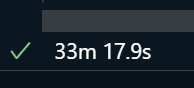